In [1]:
!pip install pandas matplotlib seaborn plotly


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


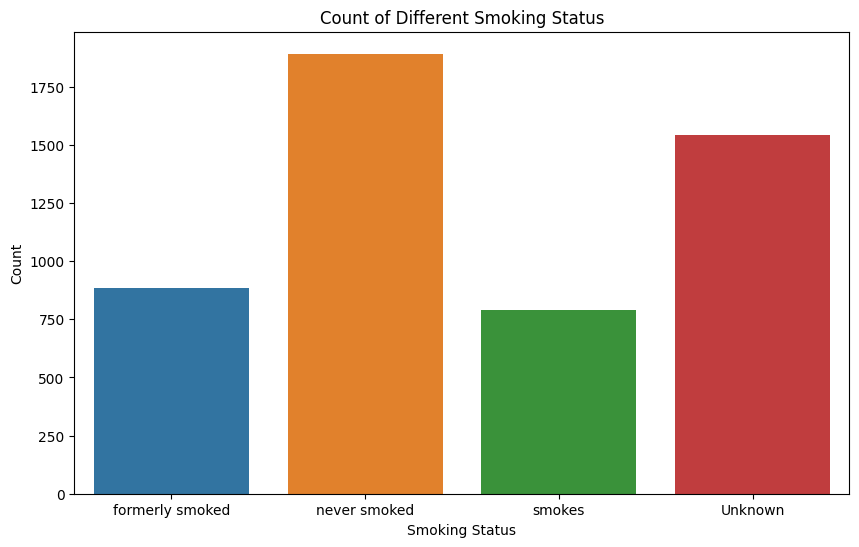

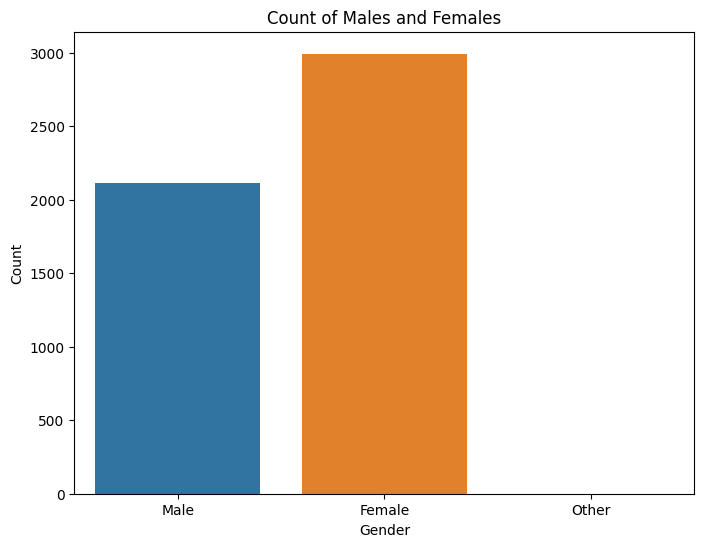

<ipython-input-4-abaf4d94ca0c>:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='age', y='smoking_status', estimator=len, ci=None, color='lightgray')


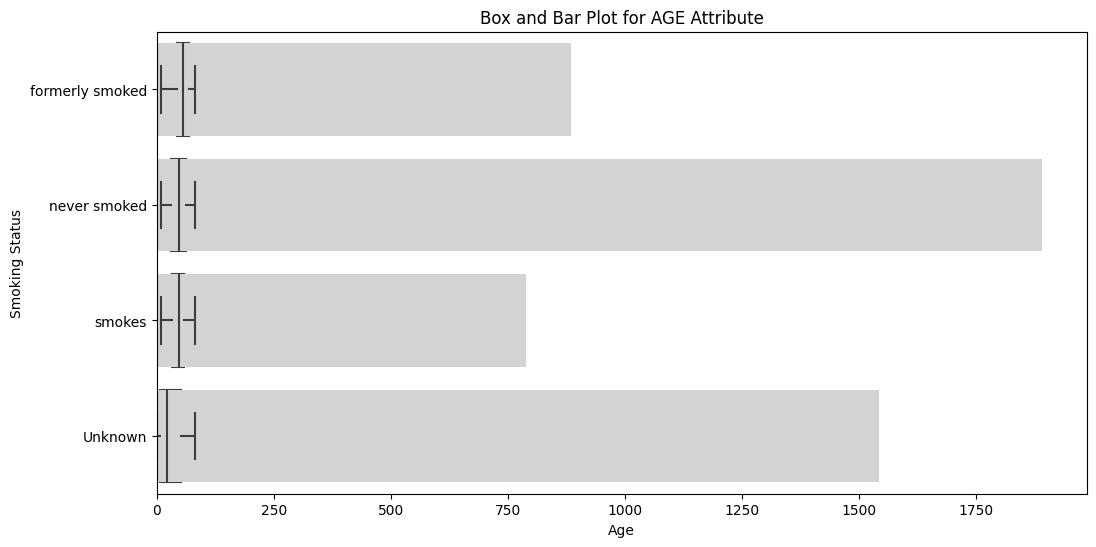

<ipython-input-4-abaf4d94ca0c>:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


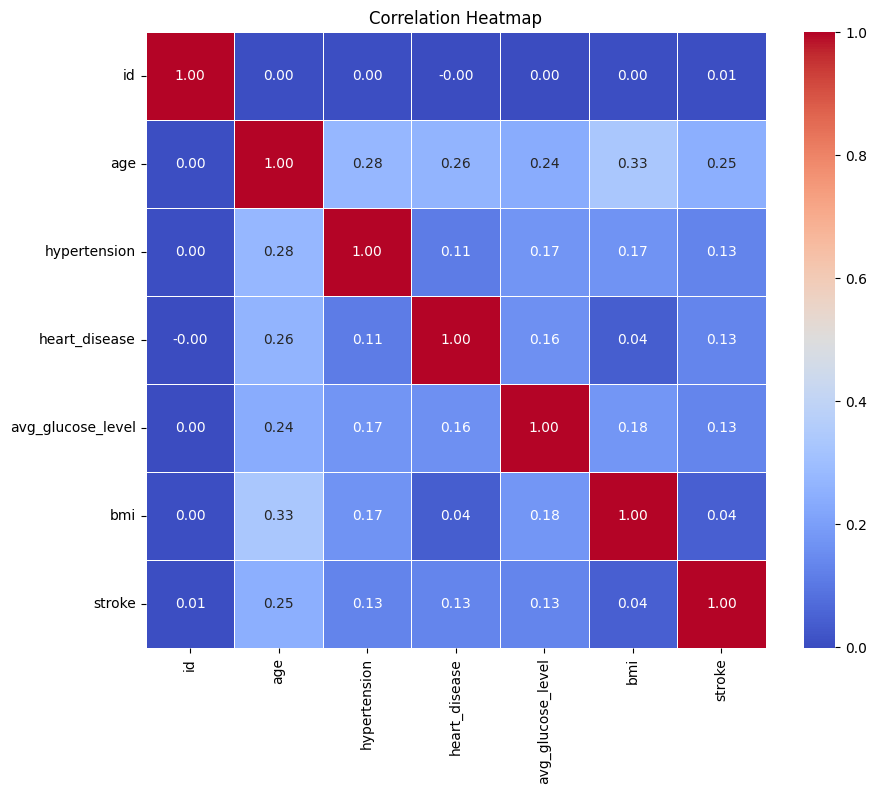

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Identify dependent and independent variables
dependent_variable = 'stroke'  # Assuming 'stroke' is the dependent variable
independent_variables = [col for col in df.columns if col != dependent_variable]

# Plot count of different types of smoking status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status')
plt.title('Count of Different Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

# Male/female count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Count of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Combined graph of bar and box plot for AGE attribute
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age', y='smoking_status')
sns.barplot(data=df, x='age', y='smoking_status', estimator=len, ci=None, color='lightgray')
plt.title('Box and Bar Plot for AGE Attribute')
plt.xlabel('Age')
plt.ylabel('Smoking Status')
plt.show()

# Correlation heatmap for various features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Read the dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Define a function to create a contingency table for two categorical variables
def create_contingency_table(data, variable1, variable2):
    contingency_table = pd.crosstab(data[variable1], data[variable2])
    return contingency_table

# Define a function to compute expected values for a contingency table
def compute_expected_values(contingency_table):
    expected_values = pd.DataFrame(np.outer(contingency_table.sum(axis=1), contingency_table.sum(axis=0)) / contingency_table.sum().sum(), index=contingency_table.index, columns=contingency_table.columns)
    return expected_values

# Define a function to perform the chi-square test and make a conclusion
def chi_square_test(contingency_table, critical_value):
    chi2, p, _, _ = chi2_contingency(contingency_table)
    df = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
    if chi2 > critical_value:
        conclusion = "ACCEPt (No significant difference)"
    else:
        conclusion = "Reject the null hypothesis (Significant difference)"
    return chi2, p, df, conclusion

# Question a) Prove (or disprove) that there are no differences in stroke occurrence between Female and Male.
contingency_gender_stroke = create_contingency_table(data, 'gender', 'stroke')
expected_gender_stroke = compute_expected_values(contingency_gender_stroke)
critical_value_a = float(input("Enter critical value for Question a): "))
chi2_a, p_a, df_a, result_a = chi_square_test(contingency_gender_stroke, critical_value_a)

print("Question a) Contingency Table:")
print(contingency_gender_stroke)
print("\nQuestion a) Expected Values Table:")
print(expected_gender_stroke)
print(f"\nQuestion a) Chi-square test results:\nChi-square statistic: {chi2_a:.2f}, p-value: {p_a:.4f}, df: {df_a}, Conclusion: {result_a}\n")

# Question b) Prove (or disprove) that there are no differences in work type of a person getting a stroke or not.
contingency_work_stroke = create_contingency_table(data, 'work_type', 'stroke')
expected_work_stroke = compute_expected_values(contingency_work_stroke)
critical_value_b = float(input("Enter critical value for Question b): "))
chi2_b, p_b, df_b, result_b = chi_square_test(contingency_work_stroke, critical_value_b)

print("Question b) Contingency Table:")
print(contingency_work_stroke)
print("\nQuestion b) Expected Values Table:")
print(expected_work_stroke)
print(f"\nQuestion b) Chi-square test results:\nChi-square statistic: {chi2_b:.2f}, p-value: {p_b:.4f}, df: {df_b}, Conclusion: {result_b}\n")

# Question c) Prove (or disprove) that there are no differences in age group of a person getting a stroke or not.
# Discretize the age column into different age groups (e.g., 0-19, 20-39, 40-59, 60+)
bins = [0, 19, 39, 59, 120]
labels = ['0-19', '20-39', '40-59', '60+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
contingency_age_stroke = create_contingency_table(data, 'age_group', 'stroke')
expected_age_stroke = compute_expected_values(contingency_age_stroke)
critical_value_c = float(input("Enter critical value for Question c): "))
chi2_c, p_c, df_c, result_c = chi_square_test(contingency_age_stroke, critical_value_c)

print("Question c) Contingency Table:")
print(contingency_age_stroke)
print("\nQuestion c) Expected Values Table:")
print(expected_age_stroke)
print(f"\nQuestion c) Chi-square test results:\nChi-square statistic: {chi2_c:.2f}, p-value: {p_c:.4f}, df: {df_c}, Conclusion: {result_c}\n")



Enter critical value for Question a): 5.9
Question a) Contingency Table:
stroke     0    1
gender           
Female  2853  141
Male    2007  108
Other      1    0

Question a) Expected Values Table:
stroke            0           1
gender                         
Female  2848.108415  145.891585
Male    2011.940313  103.059687
Other      0.951272    0.048728

Question a) Chi-square test results:
Chi-square statistic: 0.47, p-value: 0.7895, df: 2, Conclusion: Reject the null hypothesis (Significant difference)

Enter critical value for Question b): 5.9
Question b) Contingency Table:
stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2

Question b) Expected Values Table:
stroke                   0           1
work_type                             
Govt_job        624.985714   32.014286
Never_worked     20.927984    1.072016
Private        2782.470646  142.529354
Self-em

In [7]:
import pandas as pd
import scipy.stats as stats

def t_test_avg_glucose_vs_stroke(datafile):
    # Load the dataset
    data = pd.read_csv(datafile)

    # Separate data into two groups: stroke and no-stroke
    stroke_group = data[data['stroke'] == 1]['avg_glucose_level']
    no_stroke_group = data[data['stroke'] == 0]['avg_glucose_level']

    # Perform t-test assuming unequal variances (Welch's t-test)
    t_statistic, p_value = stats.ttest_ind(stroke_group, no_stroke_group, equal_var=False)

    # Define a significance level (alpha)
    alpha = 0.05

    # Print the results
    print(f'T-Statistic: {t_statistic}')
    print(f'P-Value: {p_value}')

    # Determine if the p-value is less than alpha to make a decision
    if p_value < alpha:
        print("There is a statistically significant difference in average glucose levels between stroke and no-stroke groups.")
    else:
        print("There is no statistically significant difference in average glucose levels between stroke and no-stroke groups.")

# Call the function with your dataset file
t_test_avg_glucose_vs_stroke('healthcare-dataset-stroke-data.csv')


T-Statistic: 6.982411744792963
P-Value: 2.4014366563697676e-11
There is a statistically significant difference in average glucose levels between stroke and no-stroke groups.


In [9]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
iris_data = pd.read_csv('Iris.csv')

# Create groups for the two factors: Species and Features (in this case, SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm)
groups = iris_data.groupby(['Species', 'PetalWidthCm'])

# Calculate the overall mean (Grand Mean)
grand_mean = iris_data['SepalLengthCm'].mean()

# Initialize variables for sum of squares and degrees of freedom
SS_between = 0
DF_between = len(groups) - 1
SS_error = 0
DF_error = len(iris_data) - len(groups)
SS_total = 0
DF_total = len(iris_data) - 1

# Calculate the sum of squares and degrees of freedom for between treatments, error, and total
for key, group in groups:
    group_mean = group['SepalLengthCm'].mean()
    group_size = len(group)

    # Sum of squares for each group (treatment)
    SS_group = group_size * (group_mean - grand_mean)**2
    SS_between += SS_group

    # Sum of squares for error
    SS_error += ((group['SepalLengthCm'] - group_mean)**2).sum()

# Calculate mean squares
MS_between = SS_between / DF_between
MS_error = SS_error / DF_error

# Calculate F-value
F_value = MS_between / MS_error

#critical_value

alpha=0.05
N=196
k=4
# Degrees of freedom for the numerator (dfn) and denominator (dfd)
dfn = k - 1  # Where k is the number of groups or levels in the factor
dfd = N - k  # Where N is the total number of observations

# Calculate the critical value
critical_value = stats.f.ppf(1 - alpha, dfn, dfd)

# Print the results
print(f"Sum of Squares (Between Treatments): {SS_between}")
print(f"Degrees of Freedom (Between Treatments): {DF_between}")
print(f"Mean Squares (Between Treatments): {MS_between}")
print(f"Sum of Squares (Error): {SS_error}")
print(f"Degrees of Freedom (Error): {DF_error}")
print(f"Mean Squares (Error): {MS_error}")
print(f"F-Value: {F_value}")
print("Critical")

if(F_value>=critical_value):
  print("We reject null hypothesis")

else:
  print("We accept null hypothesis")


Sum of Squares (Between Treatments): 76.01222086247088
Degrees of Freedom (Between Treatments): 26
Mean Squares (Between Treatments): 2.92354695624888
Sum of Squares (Error): 26.156112470862475
Degrees of Freedom (Error): 123
Mean Squares (Error): 0.21265132090132094
F-Value: 13.748078045588663
Critical
We reject null hypothesis
